# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 2. Loading and Inspecting the Dataset

In [3]:
df=pd.read_csv('/kaggle/input/customer-personality-analysis/marketing_campaign.csv',sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# 3. Data Exploration and Cleaning

In [4]:
df.shape

(2240, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df=df.dropna()
df.shape

(2216, 29)

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [10]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# 4. Data Transformation and Feature Engineering

In [11]:
df.describe(include=[object])

,Education,Marital_Status,Dt_Customer
count,2216,2216,2216
unique,5,8,662
top,Graduation,Married,31-08-2012
freq,1116,857,12


In [12]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [13]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [14]:
ed_map = { 'Graduation':'Graduation', 'PhD':'Higher', 'Master':'Higher', 'Basic':'Basic', '2n Cycle':'Higher'}
df['Education'] = df['Education'].map(ed_map)

In [15]:
ma_map = {'Single':1, 'Together':2, 'Married':2, 'Divorced':1, 'Widow':1, 'Alone':1,'Absurd':1, 'YOLO':1}
df['Marital_Status']=df['Marital_Status'].map(ma_map)

In [16]:
df['Age']=2025-df['Year_Birth']

In [17]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')

In [18]:
min(df['Year_Birth'])

1893

In [19]:
df['Tenure (Days)']=(pd.to_datetime('today')-df['Dt_Customer']).dt.days

In [20]:
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [21]:
df['Family Size']= df['Kidhome'] + df['Teenhome']+ df['Marital_Status']

In [22]:
df=df.drop(['Z_CostContact', 'Z_Revenue','ID', 'Year_Birth','Dt_Customer'],axis=1)

In [23]:
df[['Income','Age','Recency','Family Size','Tenure (Days)', 'Total_Spending']].describe()

,Income,Age,Recency,Family Size,Tenure (Days),Total_Spending
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,56.179603,49.012635,2.592509,4279.521209,607.075361
std,25173.076661,11.985554,28.948352,0.905722,202.434667,602.900476
min,1730.000000,29.000000,0.000000,1.000000,3926.000000,5.000000
25%,35303.000000,48.000000,24.000000,2.000000,4106.000000,69.000000
50%,51381.500000,55.000000,49.000000,3.000000,4281.500000,396.500000
75%,68522.000000,66.000000,74.000000,3.000000,4455.000000,1048.000000
max,666666.000000,132.000000,99.000000,5.000000,4625.000000,2525.000000


# 5. Outlier Removal

In [24]:
# Max age is 132
df['Age'].nlargest(5)

239     132
339     126
192     125
1950     85
424      84
Name: Age, dtype: int64

In [25]:
#income has outliers
df['Income'].nlargest(5)

2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
Name: Income, dtype: float64

In [26]:
df=df[(df['Age']<100)]
df=df[(df['Income']<200000)]

In [27]:
df.shape

(2212, 28)

# 6. Data Visualization

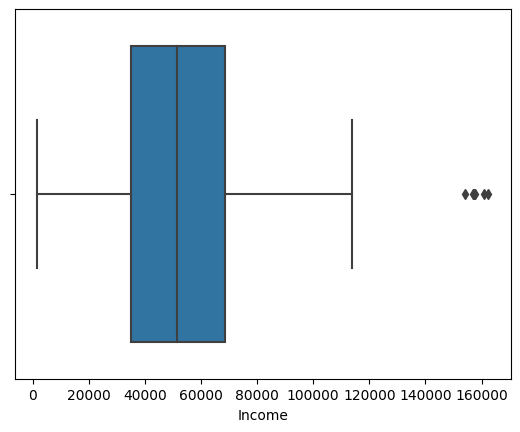

In [28]:
#univariate analysis

sns.boxplot(x=df['Income'])
plt.show()

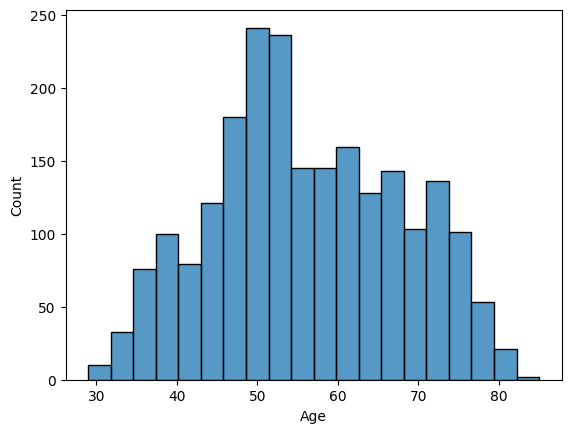

In [29]:
sns.histplot(df['Age'], bins=20)
plt.show()

<Axes: xlabel='Marital_Status'>

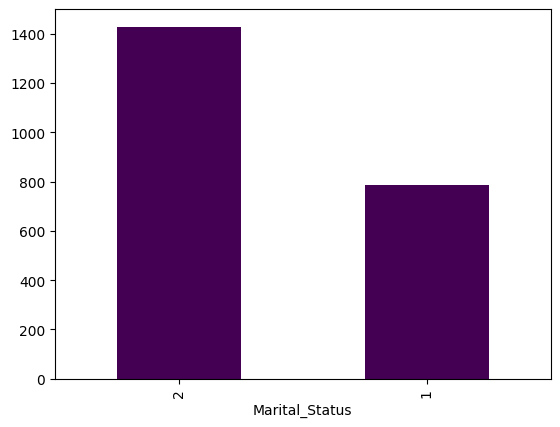

In [30]:
df['Marital_Status'].value_counts().plot(kind='bar',cmap='viridis')

<Axes: ylabel='count'>

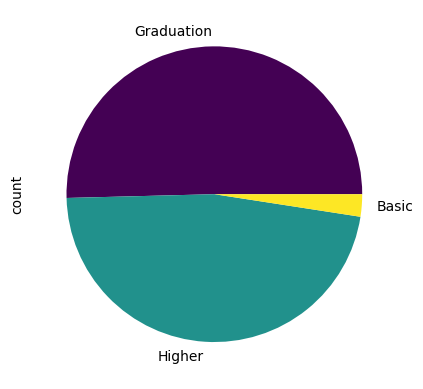

In [31]:
df['Education'].value_counts().plot(kind='pie',cmap='viridis')

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:122: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


<Axes: xlabel='Income', ylabel='Total_Spending'>

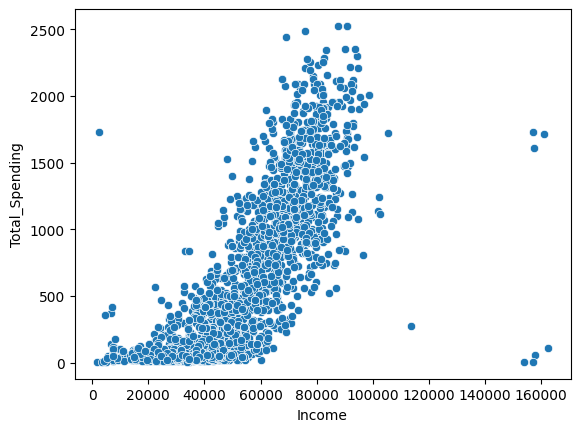

In [32]:
#bivariate analysis
sns.scatterplot(x='Income', y='Total_Spending', data=df,cmap='viridis')

In [33]:
pd.crosstab(df['Education'], df['Marital_Status'])

Marital_Status,1,2
Education,,
Basic,20,34
Graduation,402,713
Higher,362,681


<Axes: >

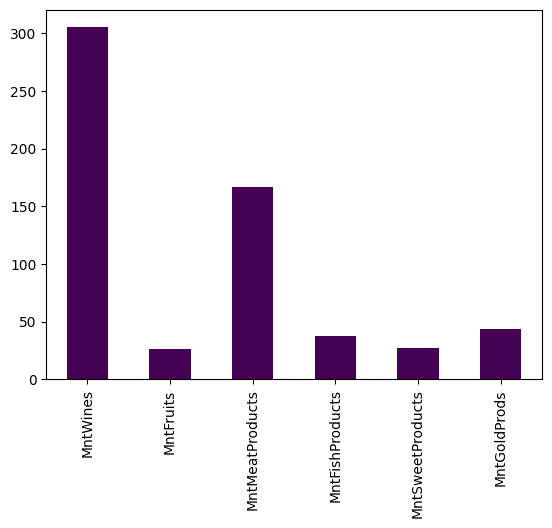

In [34]:
spending = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df[spending].mean().plot(kind='bar',cmap='viridis')

<Axes: >

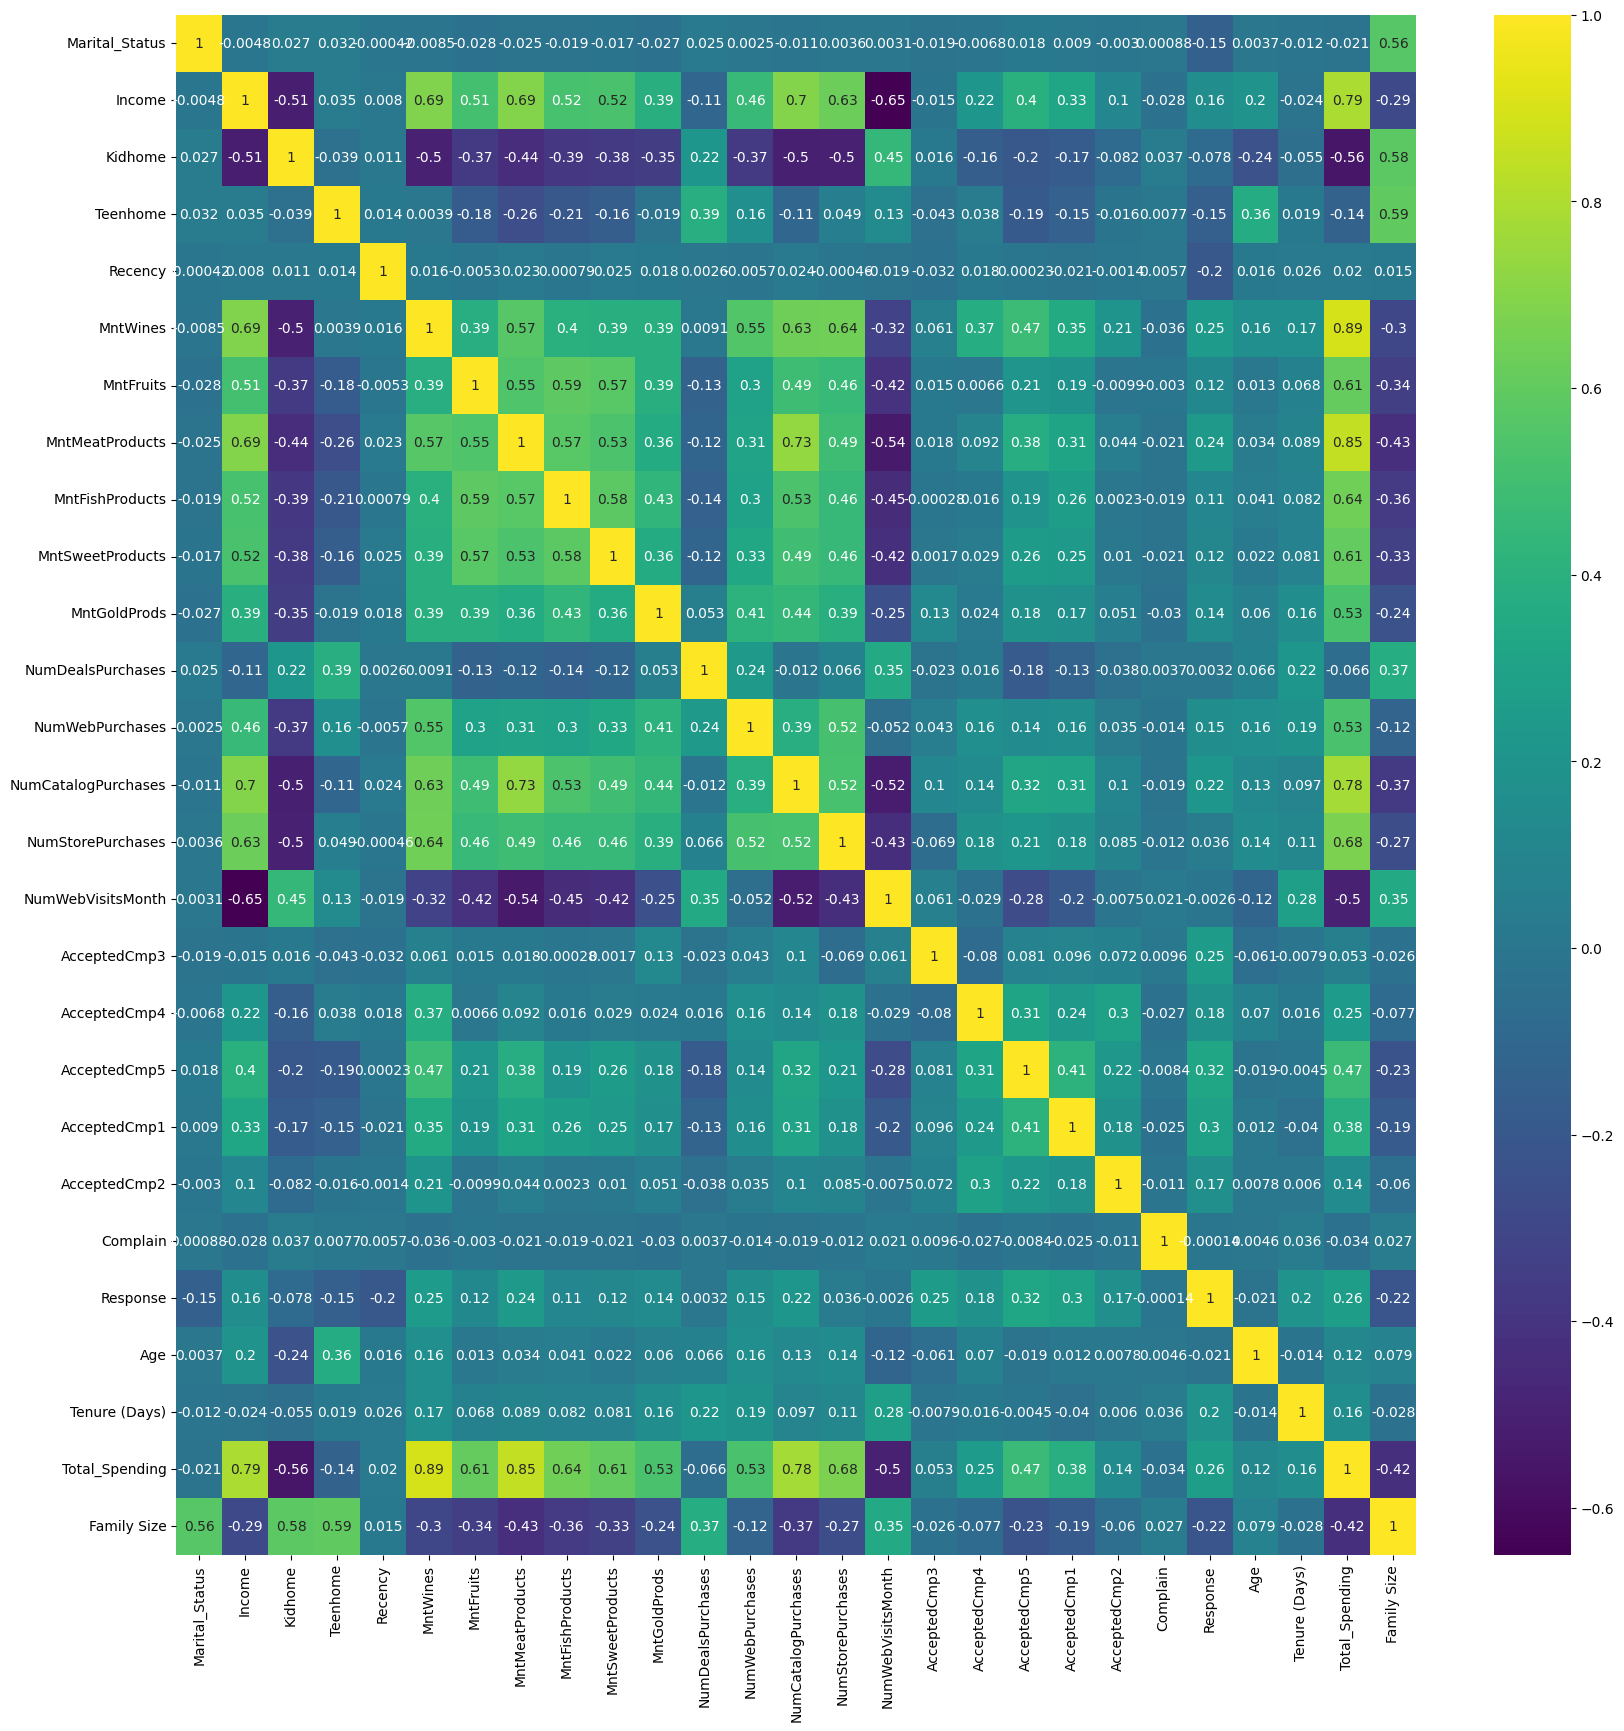

In [35]:
ndf=df.drop('Education',axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(ndf.corr(),annot=True, cmap='viridis')

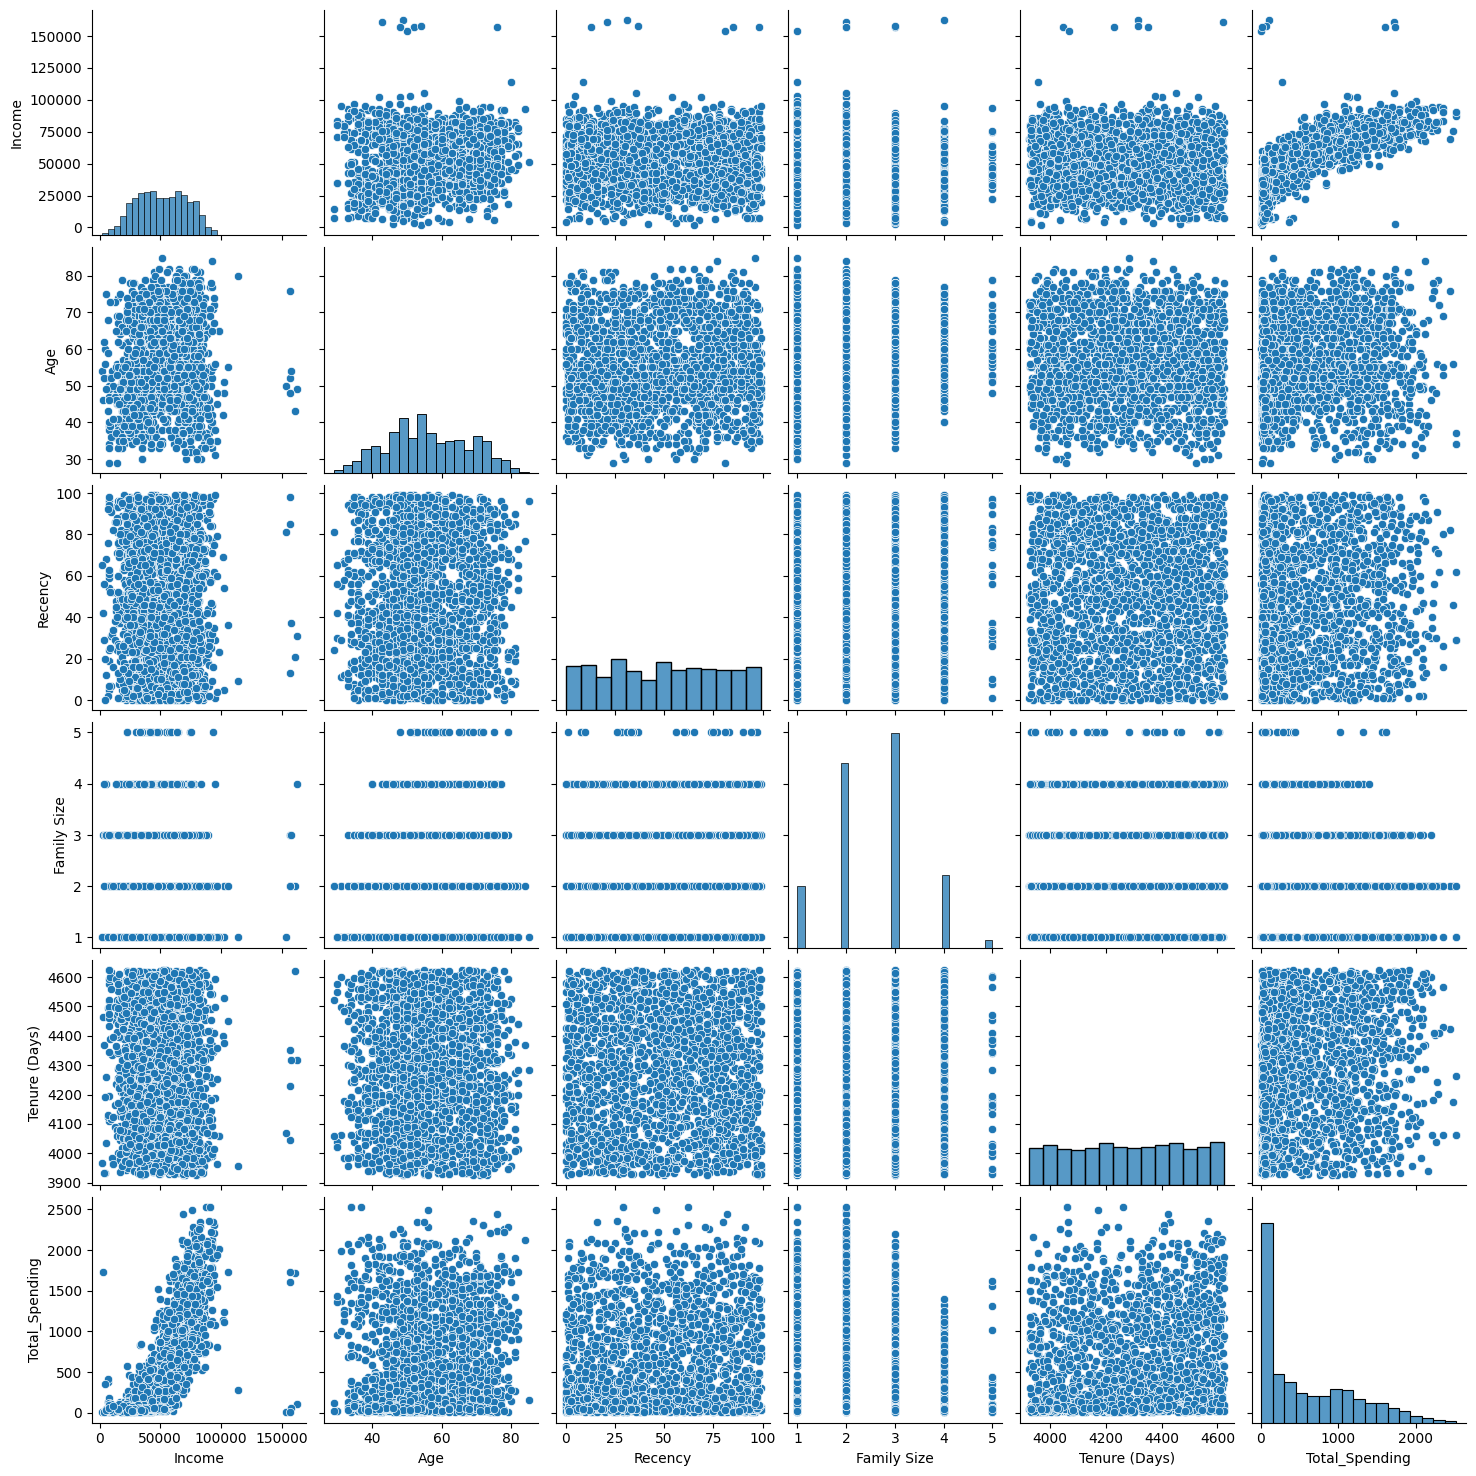

In [36]:
sns.pairplot(df[['Income','Age','Recency','Family Size','Tenure (Days)', 'Total_Spending']])

# 7. Preprocessing: Scaling and Encoding

In [37]:
numerical_cols = ['Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Tenure (Days)', 'Total_Spending',
       'Family Size']
scaler = StandardScaler()
scaled = scaler.fit_transform(df[numerical_cols])

encoded = pd.get_dummies(df[['Education']], drop_first=True)

preprocessed = np.hstack((scaled, encoded.values))

# 8. PCA (Principal Component Analysis)

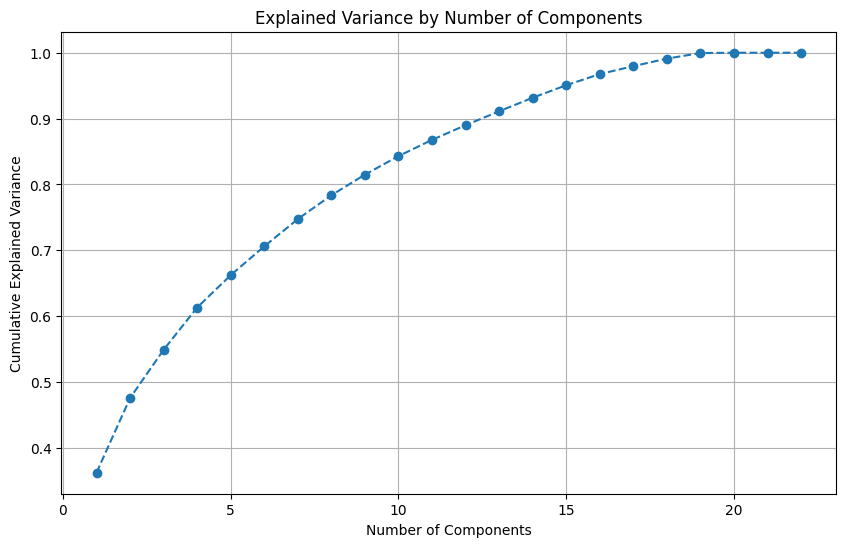

In [38]:
pca = PCA()
pca_components = pca.fit_transform(preprocessed)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()

n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.9) + 1
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(preprocessed)

In [39]:
n_components

13

# 9. KMeans Clustering

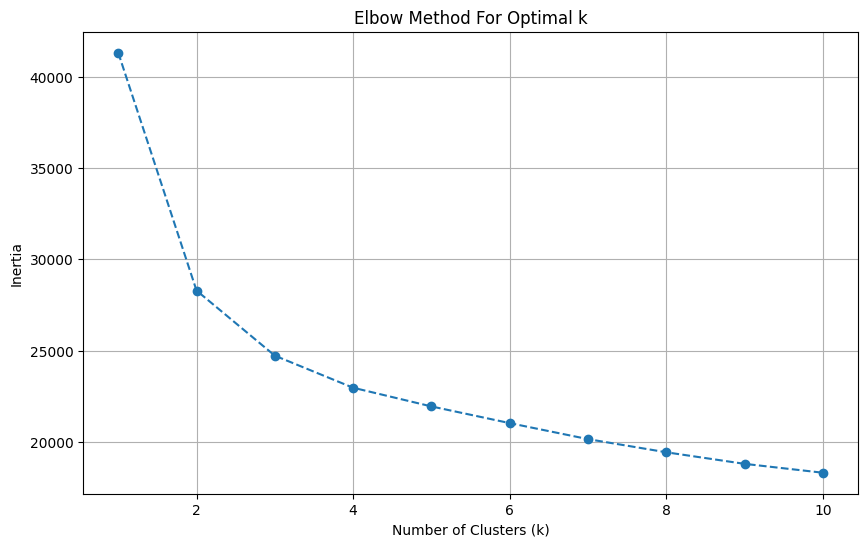

In [40]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

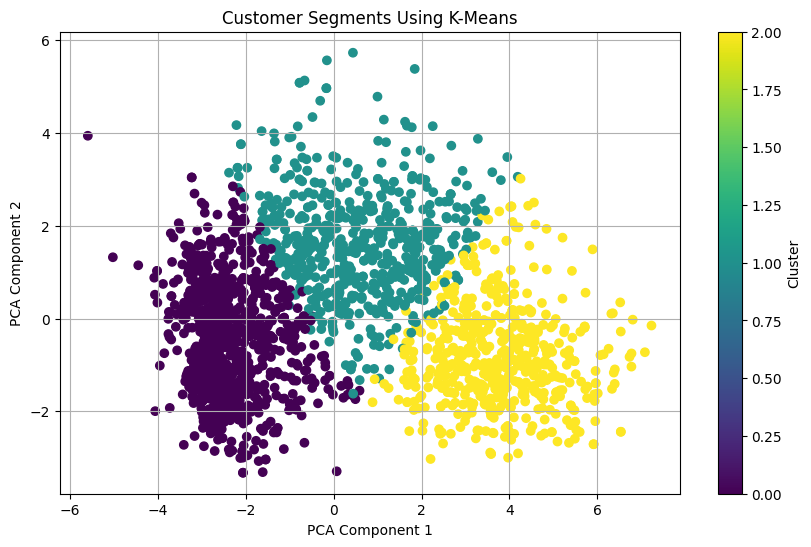

In [41]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_pca)

plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments Using K-Means')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [42]:
unique, counts = np.unique(clusters, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Number of datapoints in each cluster:", cluster_counts)

Number of datapoints in each cluster: {0: 1042, 1: 610, 2: 560}


# 10. Cluster Visualization and Analysis

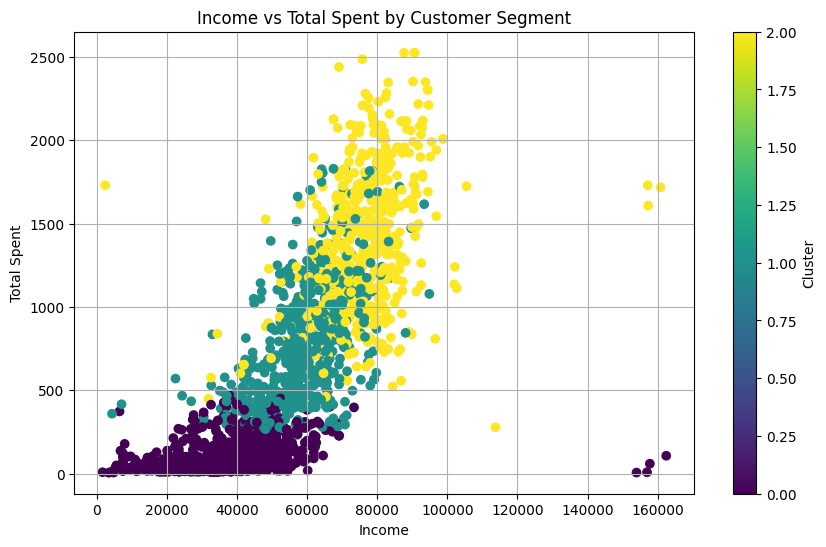

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Income'], df['Total_Spending'], c=clusters, cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.title('Income vs Total Spent by Customer Segment')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

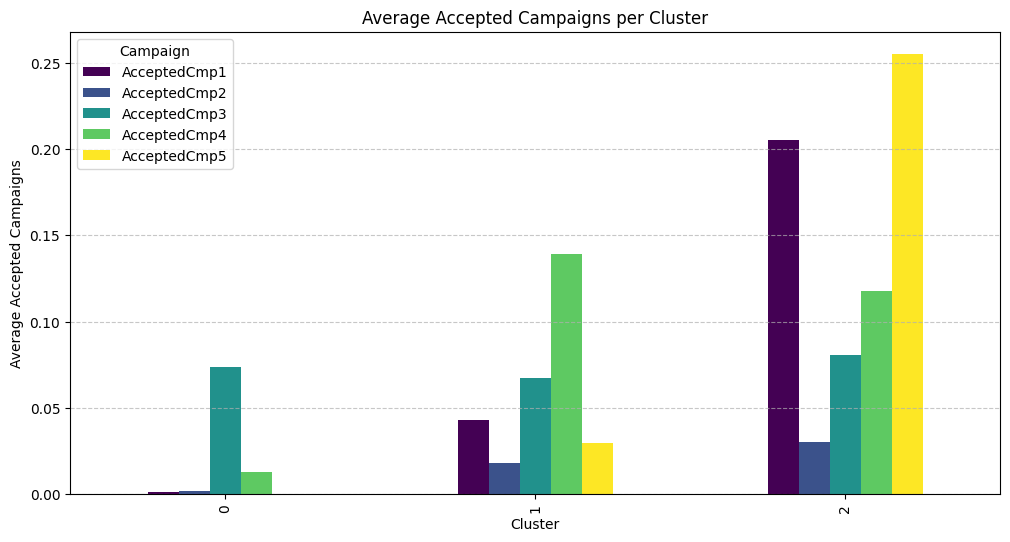

In [44]:
campaign = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
camp_means = df.groupby(clusters)[campaign].mean()

camp_means.plot(kind='bar', figsize=(12, 6),cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Average Accepted Campaigns')
plt.title('Average Accepted Campaigns per Cluster')
plt.legend(title='Campaign')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


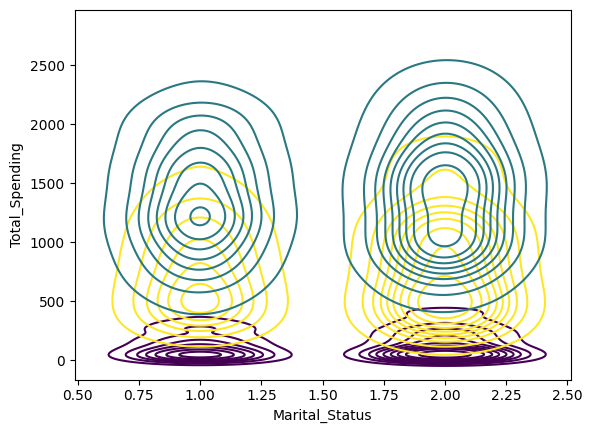

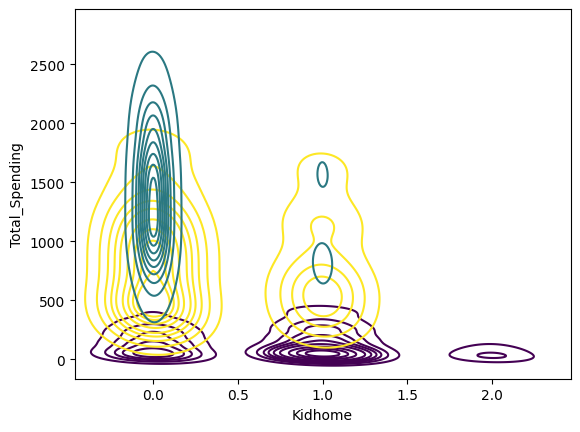

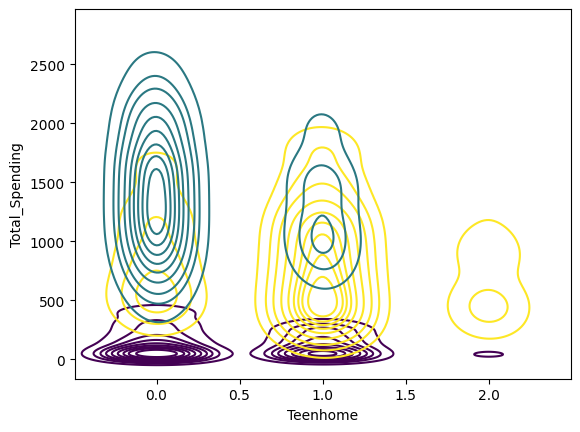

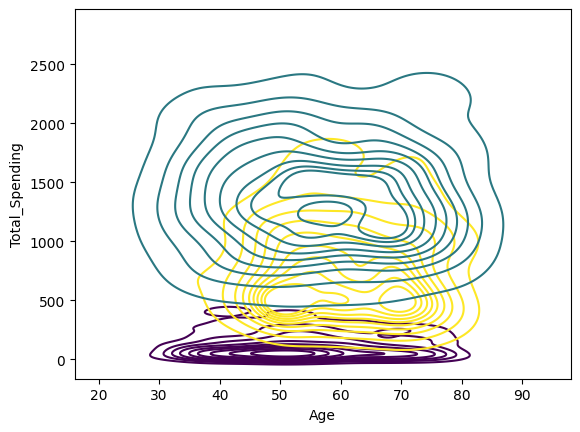

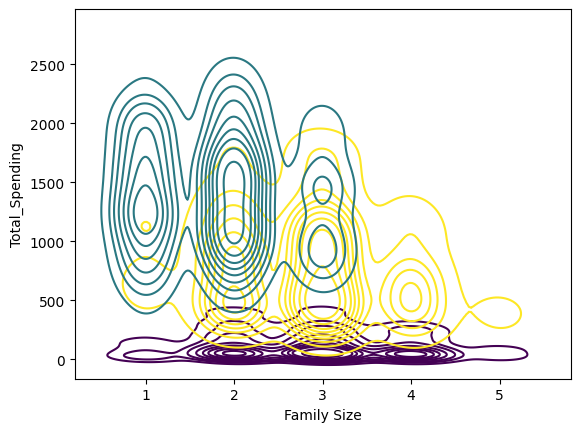

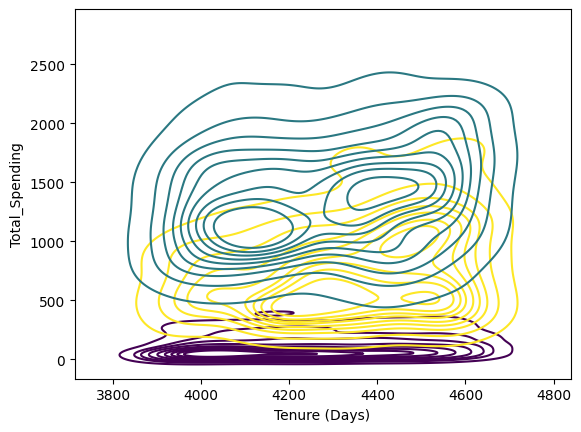

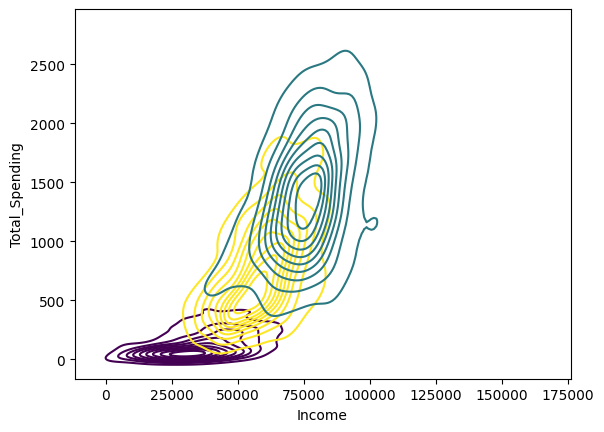

In [45]:
personal = ['Marital_Status',"Kidhome","Teenhome","Age", "Family Size",'Tenure (Days)','Income']
custom_colors = {
    0: '#440154FF',
    1: '#FDE725FF',
    2: '#2A7882FF'
}

for i in personal:
    plt.figure()
    unique_clusters = sorted(list(set(clusters)))

    for cluster in unique_clusters:
        subset = df[clusters == cluster]
        color = custom_colors.get(cluster)
        sns.kdeplot(x=subset[i], y=subset["Total_Spending"], color=color, label=cluster)
    plt.show()

**Cluster 0:**

Demographics: Mostly people without kids or teens, spanning across all age groups.

Spending and Income: This cluster spends the most and has the highest income.

**Cluster 1:**

Demographics: Families with both kids and teens, covering all age ranges.

Spending and Income: This group spends the least and has the lowest income.

**Cluster 2:**

Demographics: Households with a maximum of one kid or teen, consisting of relatively older individuals with a family size of 2-4 members.

Spending and Income: Moderate spenders and earners, falling between Cluster 0 and Cluster 1.

# 11. Response Prediction with XGBoost

In [46]:
X = pd.get_dummies(df.drop(['Response'], axis=1), drop_first=True)
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]


 Accuracy: 0.8704819277108434

 F1 Score: 0.5222222222222223

 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.93       553
           1       0.68      0.42      0.52       111

    accuracy                           0.87       664
   macro avg       0.79      0.69      0.72       664
weighted avg       0.86      0.87      0.86       664


 Confusion Matrix:
 [[531  22]
 [ 64  47]]

 ROC AUC Score: 0.8929426714236841

 Cross-Validation ROC AUC: [0.86346856 0.89714989 0.89868657 0.88771357 0.93071003]

 Mean CV ROC AUC: 0.8955457230289559


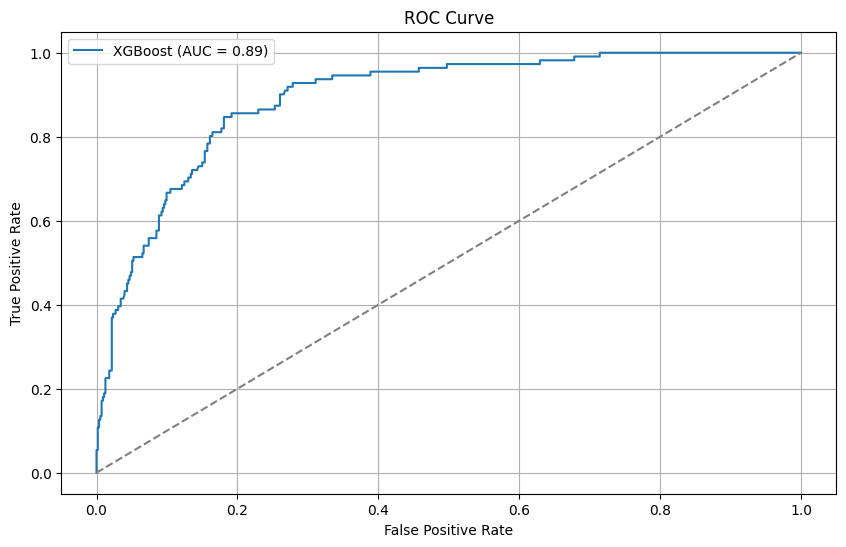

In [47]:
print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n F1 Score:", f1_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n ROC AUC Score:", roc_auc_score(y_test, y_prob))

cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='roc_auc')
print("\n Cross-Validation ROC AUC:", cv_scores)
print("\n Mean CV ROC AUC:", cv_scores.mean())

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()